In [1]:
import pandas as pd
df=pd.read_csv('diabetes.csv')
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from ydata_profiling import ProfileReport
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
# !pip install pandas-profiling

In [3]:
shape=df.shape
print(shape)

(768, 9)


In [4]:
# profile = ProfileReport(df)
# profile.to_file("diabetes.html")

In [5]:
diabetic=(df['Outcome']==1).sum()
non_diabetic=(df['Outcome']==0).sum()
print("Total Diabetic persons :",diabetic)
print("Total Non diabetic persons :",non_diabetic)

Total Diabetic persons : 268
Total Non diabetic persons : 500


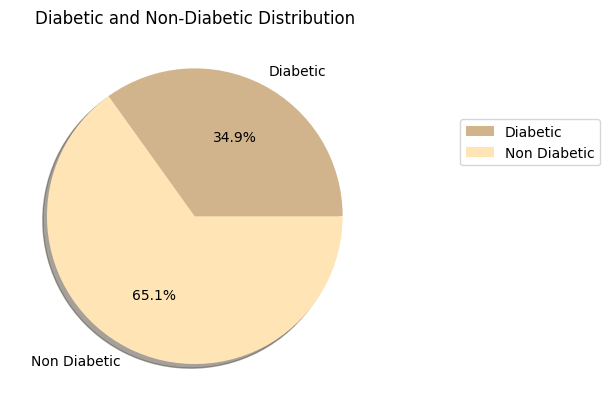

In [6]:
colours=["tan","moccasin"]
data={"Diabetic":diabetic,"Non Diabetic":non_diabetic}
plt.pie(data.values(),labels=data.keys(),colors=colours,shadow=True,autopct='%2.1f%%')
plt.legend(loc="center left",bbox_to_anchor=(1.2,0.7),labels=data.keys())
plt.title("Diabetic and Non-Diabetic Distribution")
plt.show()

In [7]:
zero_value=(df['BloodPressure']==0).sum()
print(zero_value)

35


In [25]:
nonzero_BP_non_diabetic=df.loc[(df['BloodPressure']!=0) & (df['Outcome']==0),'BloodPressure'].mean()
nonzero_BP_diabetic=df.loc[(df['BloodPressure']!=0) & (df['Outcome']==1),'BloodPressure'].mean()
df.loc[(df['BloodPressure']==0) & (df['Outcome']==0),'BloodPressure']=nonzero_BP_non_diabetic
df.loc[(df['BloodPressure']==0) & (df['Outcome']==1),'BloodPressure']=nonzero_BP_diabetic
zero_values=(df['BloodPressure']==0).sum()
print(zero_values)

0


In [9]:
zero_value=(df['SkinThickness']==0).sum()
print(zero_value)

227


In [26]:
nonzero_skinthickness_non_diabetic=df.loc[(df['SkinThickness']!=0) & (df['Outcome']==0),'SkinThickness'].mean()
nonzero_skinthickness_diabetic=df.loc[(df['SkinThickness']!=0) & (df['Outcome']==1),'SkinThickness'].mean()
df.loc[(df['SkinThickness']==0) & (df['Outcome']==0),'SkinThickness']=nonzero_skinthickness_non_diabetic
df.loc[(df['SkinThickness']==0) & (df['Outcome']==1),'SkinThickness']=nonzero_skinthickness_diabetic
zero_val=(df['SkinThickness']==0).sum()
print(zero_val)

0


In [11]:
zero_value=(df['Insulin']==0).sum()
print(zero_value)

374


In [12]:
print((df['Age']).min())
print((df['Age']).max())

21
81


In [13]:
insulin_age_21_35=df.loc[(df['Insulin']!=0) & (df['Age']>=21) & (df['Age']<35),'Insulin'].mean()
insulin_age_35_55=df.loc[(df['Insulin']!=0) & (df['Age']>=35) & (df['Age']<55),'Insulin'].mean()
insulin_age_55_82=df.loc[(df['Insulin']!=0) & (df['Age']>=55) & (df['Age']<82),'Insulin'].mean()

In [27]:
df.loc[(df['Insulin']==0) & (df['Age']>=21) & (df['Age']<35),'Insulin']=insulin_age_21_35
df.loc[(df['Insulin']==0) & (df['Age']>=35) & (df['Age']<55),'Insulin']=insulin_age_35_55
df.loc[(df['Insulin']==0) & (df['Age']>=55) & (df['Age']<82),'Insulin']=insulin_age_55_82
zeros=(df['Insulin']==0).sum()
print(zeros)

0


In [15]:
zero_value=(df['Glucose']==0).sum()
print(zero_value)

5


In [28]:
mean_glucose_nonzero=df.loc[(df['Glucose']!=0),'Glucose'].mean()
df.loc[(df['Glucose']==0),'Glucose']=mean_glucose_nonzero
zero=(df['Glucose']==0).sum()
print(zero)

0


In [17]:
zero_value=(df['BMI']==0).sum()
print(zero_value)

11


In [18]:
mean_bmi_nonzero=df.loc[(df['BMI']!=0),'BMI'].mean()
df.loc[(df['BMI']==0),'BMI']=mean_bmi_nonzero
zero=(df['BMI']==0).sum()
print(zero)

0


In [19]:
print(df['Glucose'].min())
print(df['Glucose'].max())

44.0
199.0


In [20]:
low_glucose=((df['Glucose']<70)).sum()
normal_glucose=((df['Glucose']>=70) & (df['Glucose']<=100)).sum()
high_glucose=((df['Glucose']>100)).sum()

In [21]:
print("Low Glucose Count :",low_glucose)
print("Normal Glucose Count :",normal_glucose)
print("High Glucose Count :",high_glucose)

Low Glucose Count : 11
Normal Glucose Count : 198
High Glucose Count : 559


In [22]:
low_glucose_non_diabetic=((df['Glucose']<70) & (df['Outcome']==0)).sum()
low_glucose_diabetic=((df['Glucose']<70) & (df['Outcome']==1)).sum()

normal_glucose_non_diabetic=((df['Glucose']>=70) & (df['Glucose']<=100) & (df['Outcome']==0)).sum()
normal_glucose_diabetic=((df['Glucose']>=70) & (df['Glucose']<=100) & (df['Outcome']==1)).sum()

high_glucose_non_diabetic=((df['Glucose']>100) & (df['Outcome']==0)).sum()
high_glucose_diabetic=((df['Glucose']>100) & (df['Outcome']==1)).sum()

In [23]:
print("Low Glucose and Non Diabetic Count :",low_glucose_non_diabetic)
print("Low Glucose and Diabetic Count :",low_glucose_diabetic)
print("Normal Glucose and Non Diabetic Count :",normal_glucose_non_diabetic)
print("Normal Glucose and Diabetic Count :",normal_glucose_diabetic)
print("High Glucose and Non Diabetic Count :",high_glucose_non_diabetic)
print("High Glucose and Diabetic Count :",high_glucose_diabetic)

Low Glucose and Non Diabetic Count : 11
Low Glucose and Diabetic Count : 0
Normal Glucose and Non Diabetic Count : 180
Normal Glucose and Diabetic Count : 18
High Glucose and Non Diabetic Count : 309
High Glucose and Diabetic Count : 250


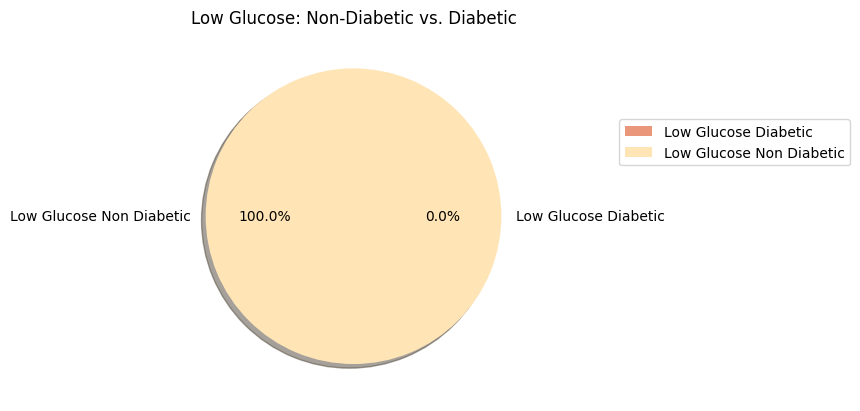

In [24]:
colours=["darksalmon","moccasin"]
data={'Low Glucose Diabetic':low_glucose_diabetic ,'Low Glucose Non Diabetic':low_glucose_non_diabetic}
plt.pie(data.values(),labels=data.keys(),colors=colours,shadow=True,autopct='%2.1f%%')
plt.legend(loc="center left",bbox_to_anchor=(1.2,0.7),labels=data.keys())
plt.title('Low Glucose: Non-Diabetic vs. Diabetic')
plt.show()

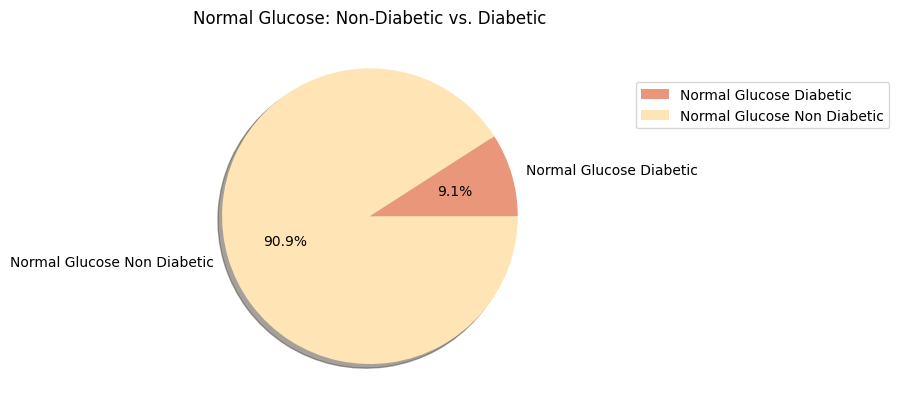

In [29]:
colours=["darksalmon","moccasin"]
data={'Normal Glucose Diabetic':normal_glucose_diabetic,'Normal Glucose Non Diabetic':normal_glucose_non_diabetic}
plt.pie(data.values(),labels=data.keys(),colors=colours,shadow=True,autopct='%2.1f%%')
plt.legend(loc="center left",bbox_to_anchor=(1.2,0.8),labels=data.keys())
plt.title('Normal Glucose: Non-Diabetic vs. Diabetic')
plt.show()

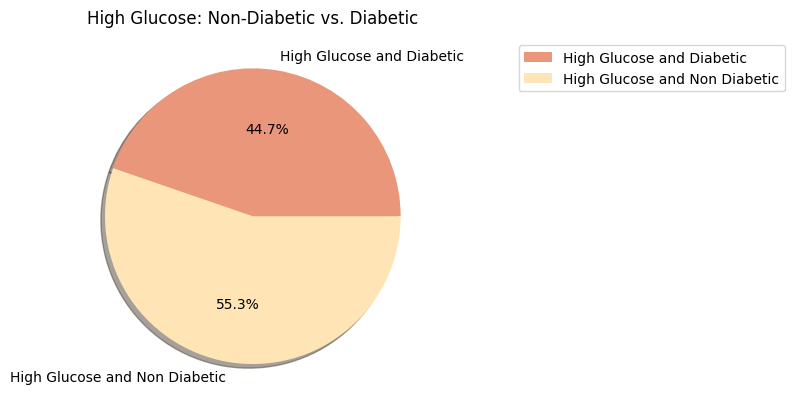

In [30]:
colours=["darksalmon","moccasin"]
data={'High Glucose and Diabetic':high_glucose_diabetic,'High Glucose and Non Diabetic':high_glucose_non_diabetic}
plt.pie(data.values(),labels=data.keys(),colors=colours,shadow=True,autopct='%2.1f%%')
plt.legend(loc="center left",bbox_to_anchor=(1.2,0.9),labels=data.keys())
plt.title('High Glucose: Non-Diabetic vs. Diabetic')
plt.show()

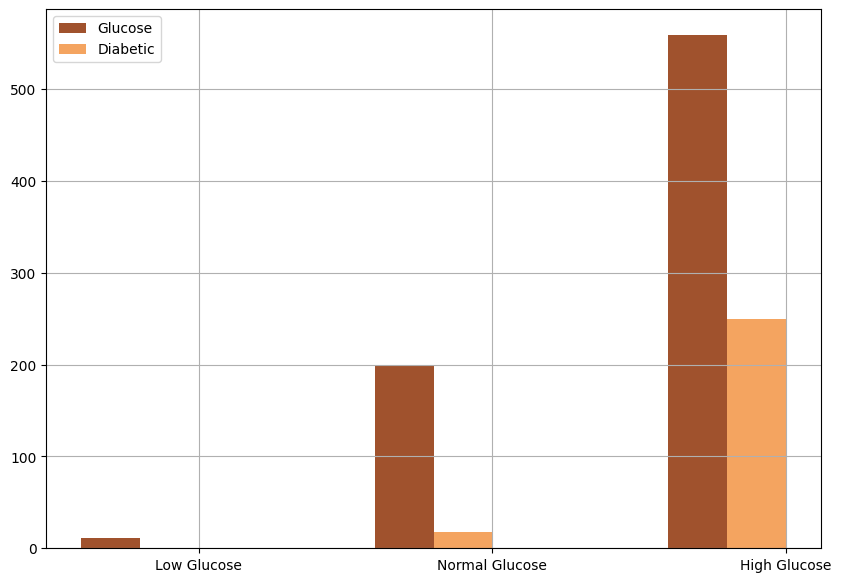

In [31]:
Glucose=[low_glucose,normal_glucose,high_glucose]
Diabetic=[low_glucose_diabetic,normal_glucose_diabetic,high_glucose_diabetic]
x=['Low Glucose' ,'Normal Glucose' ,'High Glucose']
xpos=np.arange(len(x))
plt.figure(figsize=(10,7))
barwidth=0.2
plt.bar(xpos,Glucose,color="sienna",width=barwidth,label='Glucose')
plt.bar(xpos+0.2,Diabetic,color="sandybrown",width=barwidth,label='Diabetic')
plt.legend()
plt.xticks(xpos+0.3,x)
plt.grid()
plt.show()